# Importation des bibliothèques


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn

import statsmodels.api as sm
import scipy.stats as st
from matplotlib import rcParams
from matplotlib.pyplot import matshow
import sklearn
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression

# Exploration des données

In [2]:
data_frame = pd.read_csv('framingham.csv')
heart = pd.DataFrame(data_frame)
heart_pre=pd.DataFrame(data_frame)
heart


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
heart.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Préparation des données 

### Suppression des données manquantes

In [5]:
heart.drop(['education'], axis = 1, inplace = True) 

In [6]:
count=0
for i in heart.isnull().sum(axis=1):
    if i>0:
        count=count+1
heart.dropna(axis=0,inplace=True)

0    3179
1     572
Name: TenYearCHD, dtype: int64


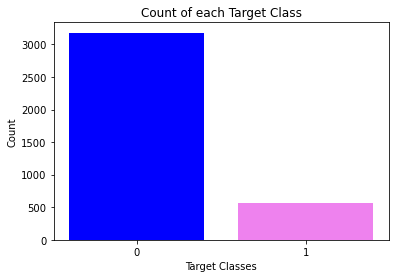

In [7]:
plt.bar(heart.TenYearCHD.unique(), heart.TenYearCHD.value_counts(), color = ['blue', 'violet'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')
print(heart.TenYearCHD.value_counts())

# histogramme

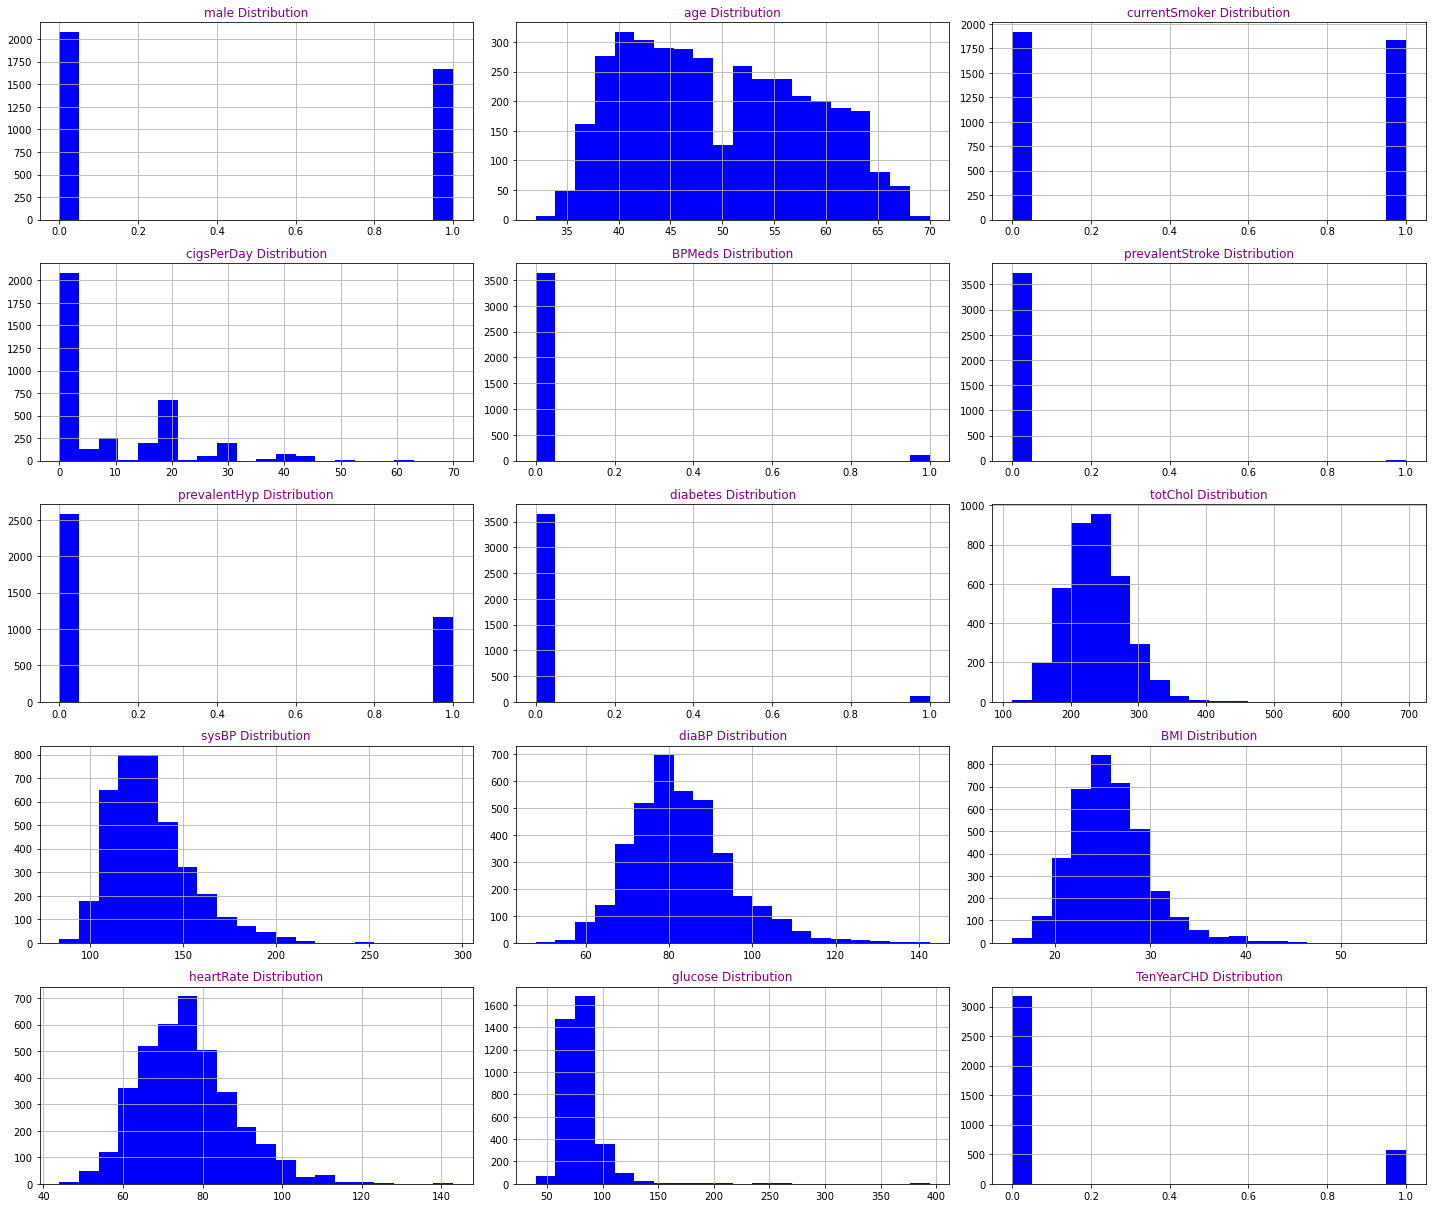

In [8]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='blue')
        ax.set_title(feature+" Distribution",color='purple')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart,heart.columns,6,3)

# Régression logistique

In [9]:
from statsmodels.tools import add_constant as add_constant
heart_constant = add_constant(heart)
heart_constant.head()

,const,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Feature Selection : Backward elemination (P-value approach)

In [10]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_constant.columns[:-1]

def back_feature_elem (data_frame,dep_var,col_list):
   
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)
result=back_feature_elem(heart_constant,heart.TenYearCHD,cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:                  0.1149
Time:                        22:43:02   Log-Likelihood:                -1417.7
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.127e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1264      0.468    -19.504      0.000     -10.043      -8.209
male           0.5815      0.105      5.524      0.000       0.375       0.788
age            0.0655      0.006     10.343      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.805      0.000       0.012       0.028
totChol        0.0023      0.001      2.106      0.035       0.000       0.004
sysBP          0.0174      0.002      8.162      0.000       0.013       0.022
glucose        0.0076      0.002      4.574      0.000       0.004       0.011
==============================================================================
"""

# Interprétation des résultats 


In [11]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000043       0.000272    0.000109   0.000
male            1.455242       2.198536    1.788687   0.000
age             1.054483       1.080969    1.067644   0.000
cigsPerDay      1.011733       1.028128    1.019897   0.000
totChol         1.000158       1.004394    1.002273   0.035
sysBP           1.013292       1.021784    1.017529   0.000
glucose         1.004346       1.010898    1.007617   0.000


# Splitting data to train and test split

In [12]:
column_list=['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']
new_heart=heart[column_list]
new_heart
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

x=new_heart.iloc[:,:-1]
y=new_heart.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

# Model Evaluation
Model accuracy

In [13]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8308921438082557

# Confusion matrix

In [20]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[617,   5],
       [122,   7]], dtype=int64)

<AxesSubplot:>

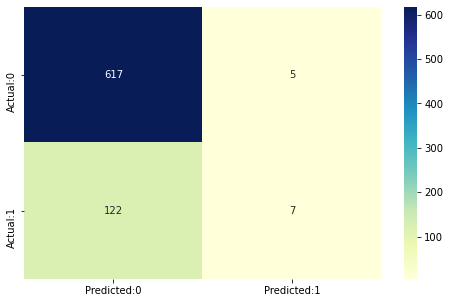

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [15]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8308921438082557
Precision: 0.5833333333333334
Recall: 0.05426356589147287


# Model Evaluation

In [34]:
 from matplotlib import rcParams
from matplotlib.pyplot import matshow
print('La précision du modèle = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'La Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensibilité ou taux de vrais positifs = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Spécificité ou taux de vrais négatifs = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Valeur prédictive = TP/(TP+FP) = ',TP/float(TP+FP),'\n',
     
'Negative  Value prédictive = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Rapport de vraisemblance positif = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Rapport de vraisemblance négatif = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

La précision du modèle = TP+TN/(TP+TN+FP+FN) =  0.8308921438082557 
 La Missclassification = 1-Accuracy =  0.1691078561917443 
 Sensibilité ou taux de vrais positifs = TP/(TP+FN) =  0.05426356589147287 
 Spécificité ou taux de vrais négatifs = TN/(TN+FP) =  0.9919614147909968 
 Positive Valeur prédictive = TP/(TP+FP) =  0.5833333333333334 
 Negative  Value prédictive = TN/(TN+FN) =  0.8349120433017592 
 Rapport de vraisemblance positif = Sensitivity/(1-Specificity) =  6.750387596899199 
 Rapport de vraisemblance négatif = (1-Sensitivity)/Specificity =  0.9534004246604602


### Probabilités prédites de 0 (pas de maladie cardiaque) et de 1 (maladie cardiaque : oui) pour les données de test

In [35]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob pas de maladie cardiaque (0)','Prob maladie cardiaque (1)'])
y_pred_prob_df.head()

,Prob pas de maladie cardiaque (0),Prob maladie cardiaque (1)
0,0.943568,0.056432
1,0.892028,0.107972
2,0.773869,0.226131
3,0.821790,0.178210
4,0.934912,0.065088


# ROC curve

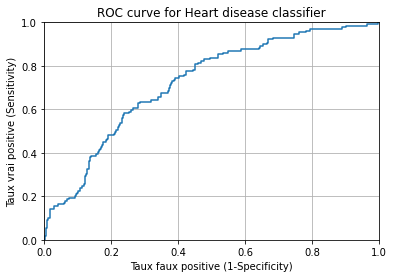

In [26]:
from sklearn.metrics import roc_curve
y_pred_prob_yes=logreg.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('Taux faux positive (1-Specificity)')
plt.ylabel('Taux vrai positive (Sensitivity)')
plt.grid(True)

In [38]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])


0.7217153966948328

# conclusion